##### CLASIFICACION TASA DE INTERES PARA PRESTAMO
Variables:
Loan_Amount_Requested:El monto indicado del préstamo solicitado por el prestatario.
Length_Employed:Duración del empleo en años
Home_Owner:El estado de propiedad de la vivienda
Annual_Income: Ingresos anuales
Income_Verified: Indicador de verificacion de ingresos
Purpose_Of_Loan: Porposito del prestamo
Debt_To_Income: Categoria del prestamo
Inquiries_Last_6Mo: Numero de requerimientos en los ultimos 6 meses
Months_Since_Deliquency:El número de meses desde la última morosidad del prestatario.
Number_Open_Accounts:El número de líneas de crédito abiertas en el archivo de crédito del prestatario.
total_accounts:	
El número total de líneas de crédito actualmente en el archivo de crédito del prestatario.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('CREDITICIO2.csv')
df = pd.DataFrame(data)
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3


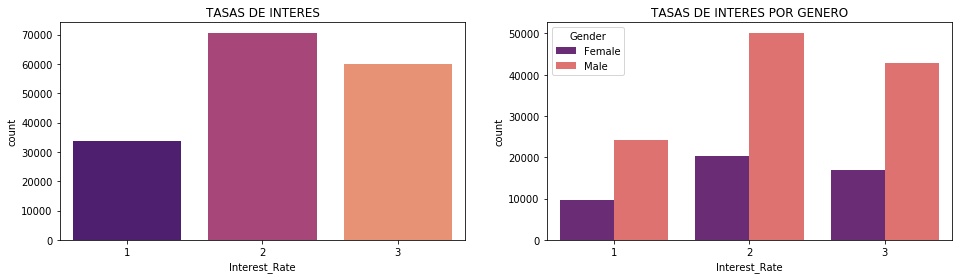

In [105]:
#Observar como se destribuye la variable a predeciR con respecto al genero
fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1, figsize=(16,4))
g =sns.countplot(df['Interest_Rate'], ax=ax0, palette="magma")
g.set(title='TASAS DE INTERES')
g = sns.countplot(df['Interest_Rate'], hue=df['Gender'], ax=ax1,palette="magma")
g.set(title='TASAS DE INTERES POR GENERO')
plt.show()

Encontramos que la tasa de interes mas comun para los solicitantes de prestamo es la tasa agrupada para la categoria 2. Por genero de solicitanes se observa una mayor participacion del genero masculino predominando las tres categorias de tasa duplicando las solicitudes del genero femenino.

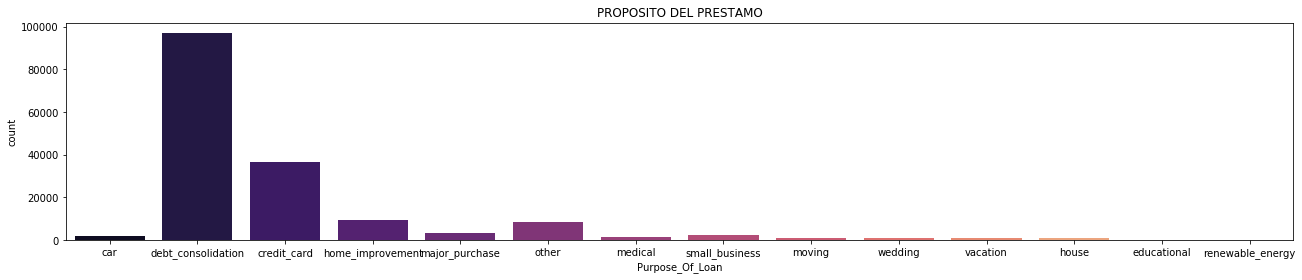

In [52]:
#Uso de credito
plt.figure(figsize=(22,4))
g = sns.countplot(df['Purpose_Of_Loan'], palette="magma")
g.set(title='PROPOSITO DEL PRESTAMO')
plt.show()

El proposito de generacion de prestamos se encuentra en mayor medida para la consolidacion de un debito seguido para un credito de tarjeta y remodelaciones de hogar como se puede observar en la imagen.

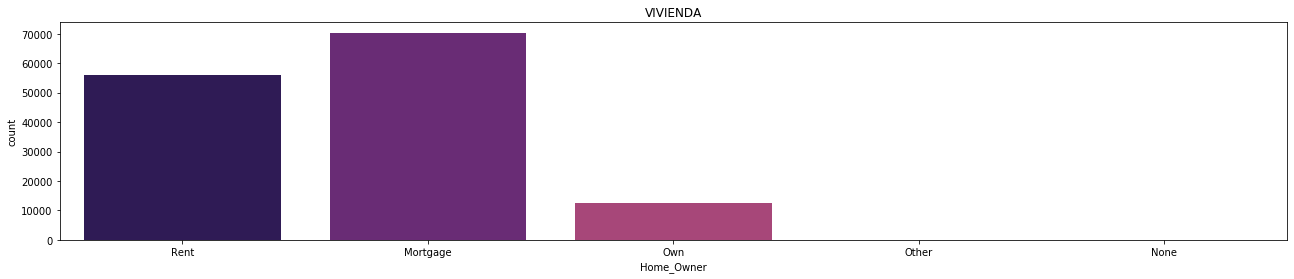

In [51]:
#ESTADO DE VIVIENDA
plt.figure(figsize=(22,4))
g = sns.countplot(df['Home_Owner'], palette="magma")
g.set(title='VIVIENDA')
plt.show()

Podemos observar el estado de la variable Home_Owner el cual es el estado de propiedad de la vivienda proporcionado por el prestatario durante el registro. se observa un mayor interes de prestamo para personas en estado de renta e hipoteca.

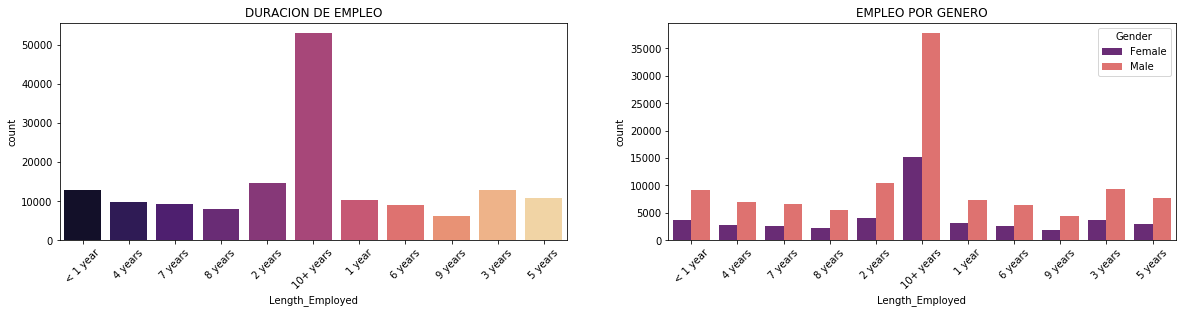

In [60]:
#DURACION DE EMPLEO PARA SOLICITANTES CON RESPECTO AL GENERO
fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1, figsize=(20,4))
g1 =sns.countplot(df['Length_Employed'], ax=ax0, palette="magma")
g1.set(title='DURACION DE EMPLEO')
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
g2 = sns.countplot(df['Length_Employed'], hue=df['Gender'], ax=ax1, palette='magma')
g2.set(title='EMPLEO POR GENERO')
g2.set_xticklabels(g2.get_xticklabels(), rotation=45)
plt.show()

El empleo por solicitante viene dado por el tiempo en años que ha estado en dicha actividad dando como resultado del analisis que los prestamos predomina para personas con mas de diez años trabajando y mostrando pequeñas variaciones para las demas categorias, al igual que por genero se observa mayor duracion en tiempo para el genero masculino que el femenino, esto viene relacionado con los analisis anteriores de genero.

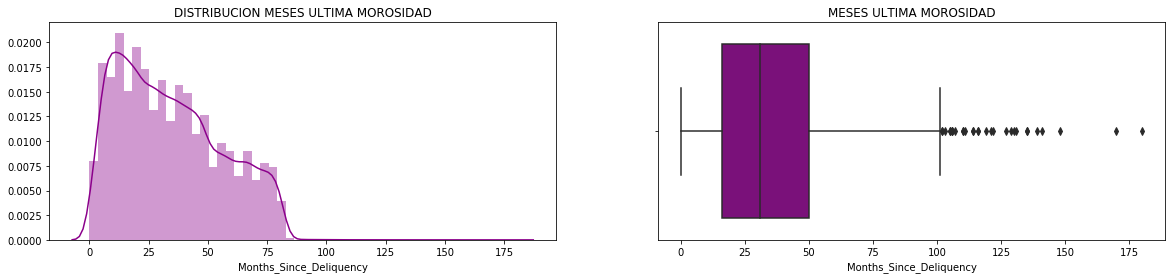

In [68]:
#MESES DESDE LA ULTIMA MOROSIDAD
fig, (ax0,ax1) = plt.subplots(ncols=2,nrows=1, figsize=(20,4))
g =sns.distplot(df['Months_Since_Deliquency'], ax=ax0,color='darkmagenta')
g.set(title='DISTRIBUCION MESES ULTIMA MOROSIDAD')
g = sns.boxplot(df['Months_Since_Deliquency'],ax=ax1, color='darkmagenta')
g.set(title='MESES ULTIMA MOROSIDAD')
plt.show()

In [67]:
df['Months_Since_Deliquency'].describe()

count    75930.000000
mean        34.229356
std         21.761180
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        180.000000
Name: Months_Since_Deliquency, dtype: float64

Observamos la distribucion de los datos de los meses de la ultima morosidad para las personas solicitantes al igual que su diagrama de caja llevando a la conclusion de una media de 34 meses, donde el 50% de los solicitantes se mantienen en el rango de 16 a 50 meses. El valor maximo encontrado 180 meses.

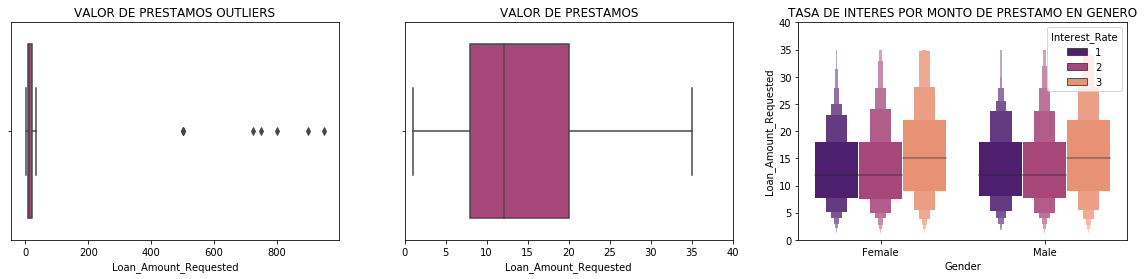

In [107]:
#MONTO DE PRESTAMO 
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3,nrows=1, figsize=(20,4))
g =sns.boxplot(df['Loan_Amount_Requested'], ax=ax0, palette='magma')
g.set(title='VALOR DE PRESTAMOS OUTLIERS')
g = sns.boxplot(df['Loan_Amount_Requested'], ax=ax1, palette='magma')
g.set(title='VALOR DE PRESTAMOS',xlim=(0,40))
g = sns.boxenplot(x='Gender', y='Loan_Amount_Requested', hue='Interest_Rate', data=df, ax=ax2, palette='magma')
g.set(ylim=(0,40), title='TASA DE INTERES POR MONTO DE PRESTAMO EN GENERO')
plt.show()

In [97]:
df['Loan_Amount_Requested'].describe()

count    164309.000000
mean         14.383537
std           9.649422
min           1.000000
25%           8.000000
50%          12.075000
75%          20.000000
max         950.000000
Name: Loan_Amount_Requested, dtype: float64

Para los montos de prestamos se observa persistencia de outliers los cuales se trataran mas adelante, ignorando por ahora, encontramos que el rango mayoritario de estos se encuentra entre 8 a 20,con una media de 14 (datos en miles). Para la ultima grafica observamos como se comportan los prestamos con sus respectivas tasas de interes para cada genero.

##### Feature engineering

In [2]:
#NO COMAS
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(",",".").astype('float64')

In [3]:
#OUTLIERS VISTOS ANTES
Max_limite = df['Loan_Amount_Requested'].mean() + 3*df['Loan_Amount_Requested'].std()
Min_limite = df['Loan_Amount_Requested'].mean() - 3*df['Loan_Amount_Requested'].std()

df= df[(df['Loan_Amount_Requested']>Min_limite) & (df['Loan_Amount_Requested']<Max_limite)]

In [4]:
df_test = pd.read_csv('test_fjtUOL8.csv')
df_test['Loan_Amount_Requested'] = df_test['Loan_Amount_Requested'].str.replace(",",".").astype('float64')
df_cont = pd.concat([df, df_test], axis=0)

In [5]:
df_cont = df_cont.drop('Loan_ID', axis=1)

In [6]:
#VALORES FALTANTES
df_cont.isnull().sum()

Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42059
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147237
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

In [7]:
duplicados = df_cont.duplicated()
duplicados.sum()

0

In [8]:
print(df_cont['Length_Employed'].unique())
df_cont['Length_Employed'] = df_cont['Length_Employed'].replace({
    np.nan:0,
    '< 1 year':0.5,
    '1 year':1,
    '2 years':2,
    '3 years':3,
    '4 years':4,
    '5 years':5,
    '6 years':6,
    '7 years':7,
    '8 years':8,
    '9 years':9,
    '10+ years':10,    
})

['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']


In [9]:
df_cont['Home_Owner'] = df_cont['Home_Owner'].fillna('Not Given')

In [10]:
df_cont['Annual_Income'] = df_cont['Annual_Income'].fillna(df_cont.groupby(['Length_Employed','Home_Owner'])['Annual_Income'].transform('mean'))

In [11]:
#NEW FEATURE
df_cont['Monthly_Income'] = (df_cont['Annual_Income']/12).round(2)
df_cont['Debt'] = df_cont['Debt_To_Income'] * df_cont['Monthly_Income']
df_cont['Latent_Accounts'] = df_cont['Total_Accounts'] - df_cont['Number_Open_Accounts']

In [12]:
#df = pd.get_dummies(data=df, columns=['Gender'], drop_first=True, )

In [13]:
df_cont['Months_Since_Deliquency'] = df_cont['Months_Since_Deliquency'].fillna(0)

In [14]:
df_cont['Loan_ratio_annual'] = df_cont['Loan_Amount_Requested']/ df_cont['Annual_Income']
df_cont['Loan_ratio_monthly'] = df_cont['Loan_Amount_Requested']/ df_cont['Monthly_Income']

In [15]:
df_cont.skew()

Loan_Amount_Requested        5.465057
Length_Employed             -0.143090
Annual_Income               39.678933
Debt_To_Income               0.192162
Inquiries_Last_6Mo           1.545934
Months_Since_Deliquency      1.309949
Number_Open_Accounts         1.161054
Total_Accounts               0.819787
Interest_Rate               -0.260993
Monthly_Income              39.678934
Debt                         2.438191
Latent_Accounts              0.992934
Loan_ratio_annual          254.365628
Loan_ratio_monthly         254.365623
dtype: float64

In [16]:
columns = ['Loan_Amount_Requested','Annual_Income','Monthly_Income','Loan_ratio_annual','Loan_ratio_monthly']

from sklearn.preprocessing import PowerTransformer
tran = PowerTransformer(method='box-cox', standardize=True)
df_cont[columns] = tran.fit_transform(df_cont[columns])

In [17]:
columns_st = ['Length_Employed','Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts','Latent_Accounts']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cont[columns_st] = scaler.fit_transform(df_cont[columns_st])

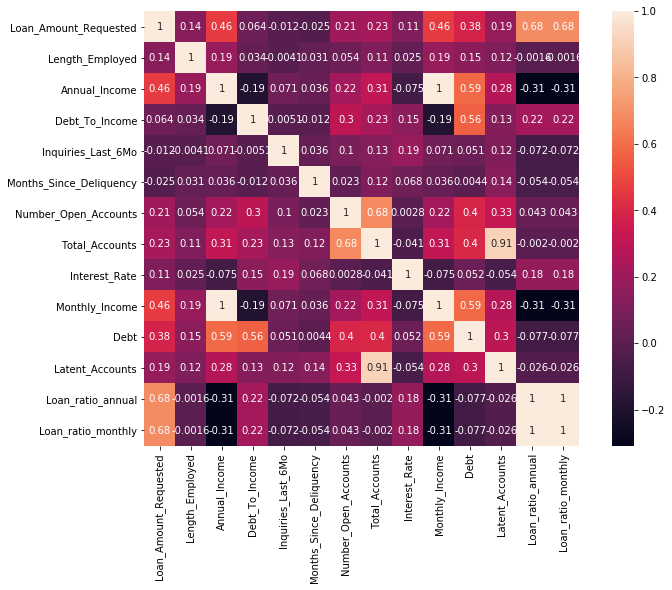

In [18]:
#CORRELATION
fig = plt.figure(figsize=(12,8))
corr = df_cont.corr()
sns.heatmap(corr, square=True, annot=True)
plt.show()

#DADA LA ALTA MULTICOLANIEDAD SE VERA UN RESULTADO MEJOR EN ALGORITMOS DE ARBOL

In [19]:
categorical = df_cont.select_dtypes(include=['object']).columns

In [20]:
df_cont = pd.get_dummies(data=df_cont, columns=categorical)

In [21]:
df_train = df_cont.iloc[:164301]
df_test = df_cont.iloc[164301:]

In [22]:
df_test = df_test.drop('Interest_Rate', axis='columns')

In [23]:
X_input = df_train.drop('Interest_Rate', axis='columns')
Y_input = df_train['Interest_Rate']

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#MODELOS
modelos = []
modelos.append(('LoR', Pipeline(steps=[('LR', LogisticRegression(solver='lbfgs', max_iter=1000))])))
modelos.append(('LDA', Pipeline(steps=[('LDA', LinearDiscriminantAnalysis())])))
modelos.append(('KNN', Pipeline(steps=[('KNN', KNeighborsClassifier(n_neighbors=4))])))
modelos.append(('DT', Pipeline(steps=[('RF',RandomForestClassifier())])))
modelos.append(('BY', Pipeline(steps=[('BY', GaussianNB())])))
modelos.append(('XG', Pipeline(steps=[('XG', XGBClassifier())])))

names = []
resultados = []

for name,modelo in modelos:
    kfol = KFold(n_splits=10,random_state=7, shuffle=True)
    resultados_cros = cross_val_score(modelo, X_input,Y_input, cv=kfol, scoring='f1_weighted')
    resultados.append(resultados_cros)
    names.append(name)
    print(f"{name}: {resultados_cros.mean()*100}% ({resultados_cros.std()*100}%)")

LoR: 25.82386263993429% (0.4653263387480916%)
LDA: 49.6048303254546% (0.2944841727923149%)
KNN: 37.499177915822486% (0.37422951811703736%)
DT: 51.01288762598066% (0.3742122014741302%)
BY: 37.79657076528092% (0.5629968372103455%)
XG: 51.23805870769015% (0.3040045222175891%)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train,X_test,Y_train,Y_test = train_test_split(X_input,Y_input, test_size=0.20)
xgb = XGBClassifier(objective='multi:softprob')
parameters = {
    'max_depth':[2,4,6],
    'n_estimators': [60,100,200],
    'learning_rate': [0.1, 0.01, 0.05]
}

model = GridSearchCV(xgb, param_grid=parameters, scoring='f1_weighted', n_jobs=-1)

model.fit(X_train,Y_train)

GridSearchCV(estimator=XGBClassifier(objective='multi:softprob'), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [60, 100, 200]},
             scoring='f1_weighted')

In [29]:
model.best_params_
#SE ESCOGIO ESTE MODELO PARA LA COMPETENCIA: VALOR 0.49 ACCURACY

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

In [30]:
model.best_score_

0.5303314253997349

In [32]:
Y_out = model.predict(df_test)

In [38]:
data_pred = pd.DataFrame()
data_pred['Loan_ID'] = df_test['Loan_ID']
data_pred['Interest_Rate'] = Y_out
data_pred.to_csv("submission2.csv", index=False)

In [40]:
data_pred.head(10)

,Loan_ID,Interest_Rate
0,10164310,2.0
1,10164311,2.0
2,10164312,2.0
3,10164313,2.0
4,10164314,2.0
5,10164315,3.0
6,10164316,3.0
7,10164317,3.0
8,10164318,3.0
9,10164319,3.0


In [41]:
# Puntuacion final 0.5307097960033597 puesto 104 de 8770